## RUN in localhost
- voila app.ipynb

___

In [14]:
import os # For checking if file exists
import matplotlib.pyplot as plt # For plot
import matplotlib.image as mpimg
import numpy as np  # For saving/loading array data in .npz format
import tensorflow as tf  # To download the MNIST dataset

___

## Load or Download and save dataset


In [2]:
DATA_FILE = 'dataset/mnist_keras_saved.npz'  # Define the filename to save/load MNIST data

In [3]:
# Check if the MNIST data file already exists locally
if not os.path.exists(DATA_FILE):
    # If file doesn't exist, download the dataset from TensorFlow
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Save the loaded data arrays into a compressed .npz file for future use
    np.savez(DATA_FILE, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
    print("Downloaded and saved MNIST data.")
else:
    # If the file exists, load the dataset arrays directly from the saved .npz file
    with np.load(DATA_FILE) as data:
        x_train = data['x_train']  # Load training images
        y_train = data['y_train']  # Load training labels
        x_test = data['x_test']    # Load test images
        y_test = data['y_test']    # Load test labels
    print("Loaded MNIST data from local file.")

Loaded MNIST data from local file.


In [4]:
# Print the number of samples in training and test sets to verify loading
print(f"Train samples: {x_train.shape}, \t Test samples: {x_test.shape}")

Train samples: (60000, 28, 28), 	 Test samples: (10000, 28, 28)


___

## Plot a sample from dataset

In [5]:
print(f"Number of sample in traning set: {x_train.shape[0]}")
i = np.random.randint(0, x_train.shape[0])
print(f"Random choice: {i}, \t Value this No. in datase: {y_train[i]}")

Number of sample in traning set: 60000
Random choice: 43606, 	 Value this No. in datase: 8


- x_train: is a NumPy array of shape (60000, 28, 28) which means you have 60,000 samples.
- Each sample is a 28x28 matrix (likely grayscale image data, e.g., MNIST digits).

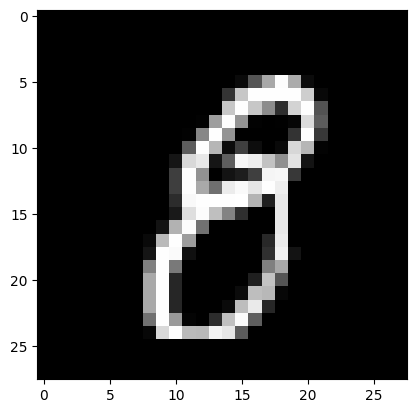

In [6]:
plt.imshow(x_train[i], cmap='gray');
plt.show()

___

## Reshape 

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')

In [8]:
# Print the number of samples in training and test sets after reshape
print(f"Train samples: {x_train.shape}, \t Test samples: {x_test.shape}")

Train samples: (60000, 28, 28, 1), 	 Test samples: (10000, 28, 28)


Reshape:
- Reshaped the data to (60000, 28, 28, 1).
- Added a new final dimension with size 1. (channel size) , ( images were grayscale, grayscale = 1, RGB = 3 )
- This is commonly done to make the data compatible with convolutional neural networks (CNNs) in Keras or TensorFlow, where images typically have a channel dimension.
- Since the original images were grayscale, they have only 1 channel, so add that channel dimension explicitly.
- Also converted the data type to float32 for neural network input, as most frameworks prefer float data types over integers.


Summary:
- Original shape: (num_samples, height, width) = (60000, 28, 28)
- New shape: (num_samples, height, width, channels) = (60000, 28, 28, 1)

This reshaping prepares the data for CNN layers that expect 4D input tensor with shape (batch_size, height, width, channels).

## Min and Max value in color range in grayscale

In [9]:
print(f"Max value: {x_train[0].min()} \t Min value: {x_train[0].max()}")

Max value: 0.0 	 Min value: 255.0


___

## Normalize

Normalize:
- Convert value 0,255 to -1,1

In [10]:
x_train = (x_train -127.5) / 127.5

In [11]:
print(f"Max value: {x_train[0].min()} \t Min value: {x_train[0].max()}")

Max value: -1.0 	 Min value: 1.0


___

## Convert type dataset to tensorflow

In [12]:
buffer_size = 60000
batch_size = 256
number_of_pic_in_each_batch = buffer_size // batch_size
print(f"number_of_pic_in_each_batch: {number_of_pic_in_each_batch}")

number_of_pic_in_each_batch: 234


___

# DCGAN

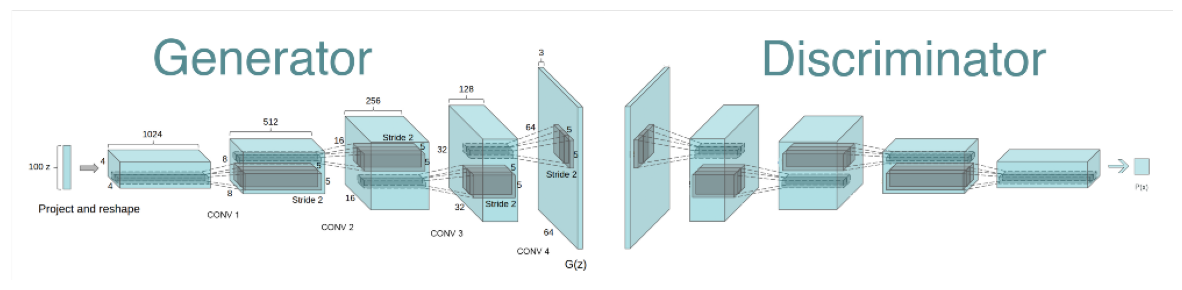

In [19]:
# Load the image
img = mpimg.imread('pic/DCGAN.png')

# Display the image
plt.figure(figsize=(15, 10)) 
plt.imshow(img)
plt.axis('off') 
plt.show()

___

## Building the Generator